In [1]:
#Usual Suspects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import yfinance as yf
# Use PyPortfolioOpt for Calculations
from pypfopt import EfficientFrontier, objective_functions
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting
from pypfopt import DiscreteAllocation

In [2]:
symbols = ['MINT.BK', 'BANPU.BK', 'TOP.BK', 'DELTA.BK', 'IRPC.BK', 'PTTGC.BK', 'WHA.BK', 'SCC.BK', 'CPN.BK', 'CENTEL.BK', 'PTT.BK', 'BCP.BK'] 

In [63]:
#Get the stock data
start='2023-01-01'
end='2023-01-31'
portfolio = yf.download(symbols, start=start, end=end)['Adj Close']

portfolio.head()

C:\Users\TGAdmin\anaconda3\envs\pymc_env\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\TGAdmin\anaconda3\envs\pymc_env\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]C:\Users\TGAdmin\anaconda3\envs\pymc_env\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]C:\Users\TGAdmin\anaconda3\envs\pymc_env\L

Ticker,BANPU.BK,BCP.BK,CENTEL.BK,CPN.BK,DELTA.BK,IRPC.BK,MINT.BK,PTT.BK,PTTGC.BK,SCC.BK,TOP.BK,WHA.BK
Date,,,,,,,,,,,,
2023-01-03,12.099860,29.105591,51.00,68.074379,91.994225,2.886981,31.997320,30.188902,45.603870,337.165344,50.821960,4.052257
2023-01-04,11.558076,28.412600,52.00,68.313232,90.213684,2.847967,32.243454,29.497553,45.847744,340.122925,49.226654,3.955774
2023-01-05,11.558076,28.181604,51.25,67.357811,79.728333,2.867474,32.735722,29.728003,45.360004,344.066376,49.226654,3.878589
2023-01-06,11.106589,28.181604,51.50,68.074379,79.926170,2.867474,32.981853,29.958452,45.116131,345.052246,49.226654,3.917182
2023-01-09,11.287184,28.874594,51.50,67.835518,83.289391,2.906487,32.981853,30.419353,46.335487,347.023956,49.682457,3.897885


In [64]:
market_prices = yf.download("^SET.BK", start=start, end=end)['Adj Close']
market_prices.head()

C:\Users\TGAdmin\anaconda3\envs\pymc_env\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


Date
2023-01-03    1678.969971
2023-01-04    1673.250000
2023-01-05    1663.859985
2023-01-06    1673.859985
2023-01-09    1691.119995
Name: Adj Close, dtype: float64

In [65]:
mcaps = {}
for t in symbols:
    stock = yf.Ticker(t)
    mcaps[t] = stock.info["marketCap"]
mcaps

{'MINT.BK': 189944332288,
 'BANPU.BK': 55604895744,
 'TOP.BK': 132355031040,
 'DELTA.BK': 907468931072,
 'IRPC.BK': 38984245248,
 'PTTGC.BK': 175845163008,
 'WHA.BK': 72043577344,
 'SCC.BK': 302400012288,
 'CPN.BK': 286109990912,
 'CENTEL.BK': 60412502016,
 'PTT.BK': 971142004736,
 'BCP.BK': 61961404416}

In [66]:
S = risk_models.CovarianceShrinkage(portfolio).ledoit_wolf()

delta = black_litterman.market_implied_risk_aversion(market_prices)
delta

0.03606882566847272

In [67]:
market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
market_prior

Ticker
BANPU.BK     0.020016
BCP.BK       0.020196
CENTEL.BK    0.020066
CPN.BK       0.020297
DELTA.BK     0.021795
IRPC.BK      0.020216
MINT.BK      0.020021
PTT.BK       0.020740
PTTGC.BK     0.020412
SCC.BK       0.020202
TOP.BK       0.020252
WHA.BK       0.020324
dtype: float64

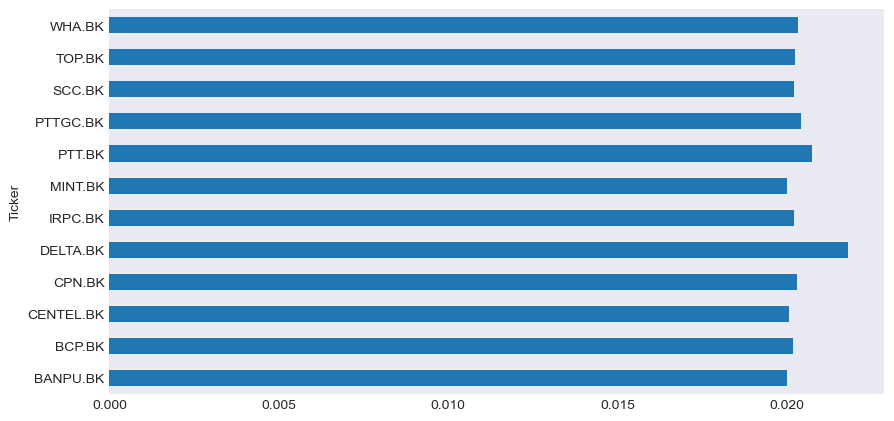

In [68]:
market_prior.plot.barh(figsize=(10,5));

In [69]:
view_dict = {'MINT.BK': 0.002447271236954671,
 'BANPU.BK': -0.023270882382923946,
 'TOP.BK': 0.0010678475639648946,
 'DELTA.BK': -0.036209614674084026,
 'IRPC.BK': -0.027065027967944605,
 'PTTGC.BK': -0.005472451794304363,
 'WHA.BK': -0.027378454646140943,
 'SCC.BK': -0.0008380904988795355,
 'CPN.BK': 0.006040208040029777,
 'CENTEL.BK': 0.009387247137305484,
 'PTT.BK': -0.013693220604347689,
 'BCP.BK': -0.05187004701552743}

# view_dict= {'MINT.BK': 0.5,
#  'BANPU.BK': -0.1,
#  'TOP.BK': 0.02,
#  'DELTA.BK': 1,
#  'IRPC.BK': 0.2,
#  'PTTGC.BK': -0.005472451794304363,
#  'WHA.BK': -0.027378454646140943,
#  'SCC.BK': -0.0008380904988795355,
#  'CPN.BK': 0.006040208040029777,
#  'CENTEL.BK': 0.009387247137305484,
#  'PTT.BK': -0.013693220604347689,
#  'BCP.BK': -0.05187004701552743}

In [70]:
view_uncertainty = {'MINT.BK': 0.00012322140753027203,
 'BANPU.BK': 0.00012403750261516687,
 'TOP.BK': 0.00019572450145511315,
 'DELTA.BK': 0.0008057969382672543,
 'IRPC.BK': 0.00014679429361624975,
 'PTTGC.BK': 9.470994506818193e-05,
 'WHA.BK': 0.00017747626605975946,
 'SCC.BK': 3.156809321696324e-05,
 'CPN.BK': 6.614331164393798e-05,
 'CENTEL.BK': 0.00014122606148905562,
 'PTT.BK': 7.424036566177371e-05,
 'BCP.BK': 0.00040549728636902474}


In [71]:
omega = np.diag(list(view_uncertainty.values()))

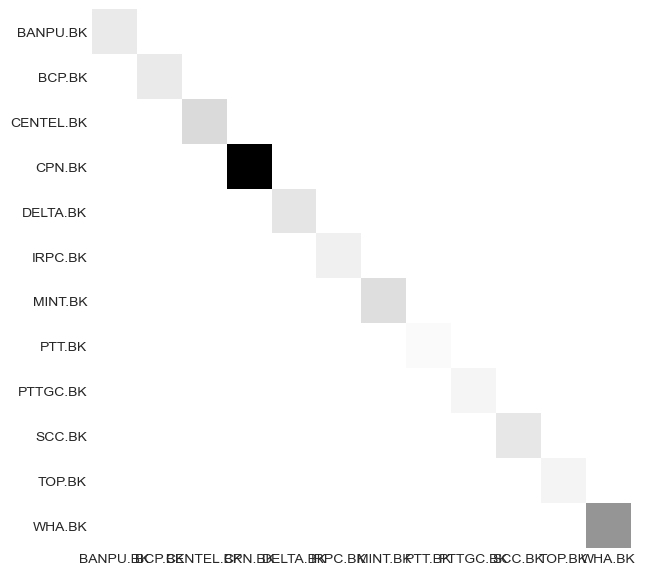

In [72]:
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(omega)

# We want to show all ticks...
ax.set_xticks(np.arange(len(bl.tickers)))
ax.set_yticks(np.arange(len(bl.tickers)))

ax.set_xticklabels(bl.tickers)
ax.set_yticklabels(bl.tickers)
plt.show()

In [73]:
# We are using the shortcut to automatically compute market-implied prior
bl = BlackLittermanModel(S, pi="market", market_caps=mcaps, risk_aversion=delta,
                        absolute_views=view_dict, omega=omega)

In [74]:
ret_bl = bl.bl_returns()
ret_bl

Ticker
BANPU.BK    -0.022658
BCP.BK      -0.049536
CENTEL.BK    0.009057
CPN.BK       0.005906
DELTA.BK    -0.033296
IRPC.BK     -0.026211
MINT.BK      0.002469
PTT.BK      -0.013537
PTTGC.BK    -0.005510
SCC.BK      -0.000832
TOP.BK       0.000521
WHA.BK      -0.025992
dtype: float64

In [75]:
rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(view_dict)],
             index=["Prior", "Posterior", "Views"]).T
rets_df

,Prior,Posterior,Views
BANPU.BK,0.020016,-0.022658,-0.023271
BCP.BK,0.020196,-0.049536,-0.051870
CENTEL.BK,0.020066,0.009057,0.009387
CPN.BK,0.020297,0.005906,0.006040
DELTA.BK,0.021795,-0.033296,-0.036210
IRPC.BK,0.020216,-0.026211,-0.027065
MINT.BK,0.020021,0.002469,0.002447
PTT.BK,0.020740,-0.013537,-0.013693
PTTGC.BK,0.020412,-0.005510,-0.005472
SCC.BK,0.020202,-0.000832,-0.000838


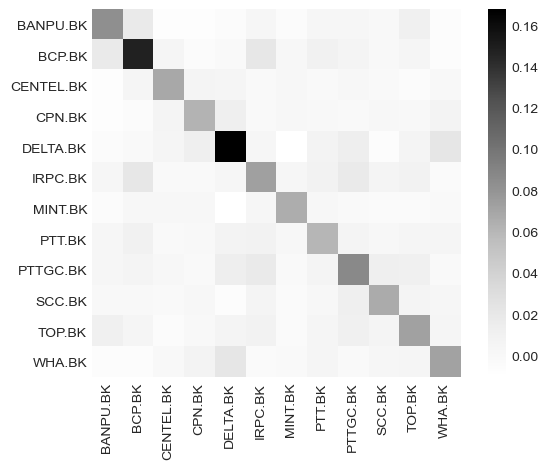

In [76]:
S_bl = bl.bl_cov()
plotting.plot_covariance(S_bl);

In [82]:
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe(risk_free_rate=0.0227/12)
weights = ef.clean_weights()
weights

C:\Users\TGAdmin\anaconda3\envs\pymc_env\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


OrderedDict([('BANPU.BK', 0.0),
             ('BCP.BK', 0.0),
             ('CENTEL.BK', 0.60999),
             ('CPN.BK', 0.34184),
             ('DELTA.BK', 0.0),
             ('IRPC.BK', 0.0),
             ('MINT.BK', 0.04817),
             ('PTT.BK', 0.0),
             ('PTTGC.BK', 0.0),
             ('SCC.BK', 0.0),
             ('TOP.BK', 0.0),
             ('WHA.BK', 0.0)])

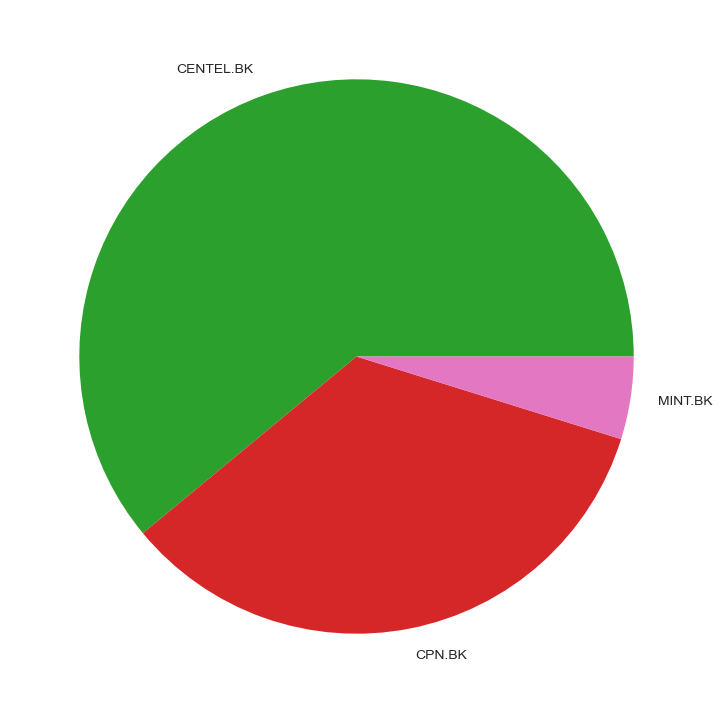

In [83]:
pd.Series(weights).plot.pie(figsize=(9,9));

In [86]:
weights

OrderedDict([('BANPU.BK', 0.0),
             ('BCP.BK', 0.0),
             ('CENTEL.BK', 0.60999),
             ('CPN.BK', 0.34184),
             ('DELTA.BK', 0.0),
             ('IRPC.BK', 0.0),
             ('MINT.BK', 0.04817),
             ('PTT.BK', 0.0),
             ('PTTGC.BK', 0.0),
             ('SCC.BK', 0.0),
             ('TOP.BK', 0.0),
             ('WHA.BK', 0.0)])